<a href="https://colab.research.google.com/github/yashsuthar00/Machine-learning/blob/main/IDS_ML_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder ,StandardScaler,MinMaxScaler
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics


## Code to Access Dataset file from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config IPCompleter.greedy=True
import warnings
warnings.filterwarnings("ignore")
dataset =pd.read_csv("drive/My Drive/ML Workshop/IDS.csv")

Mounted at /content/drive


In [ ]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        dataset[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

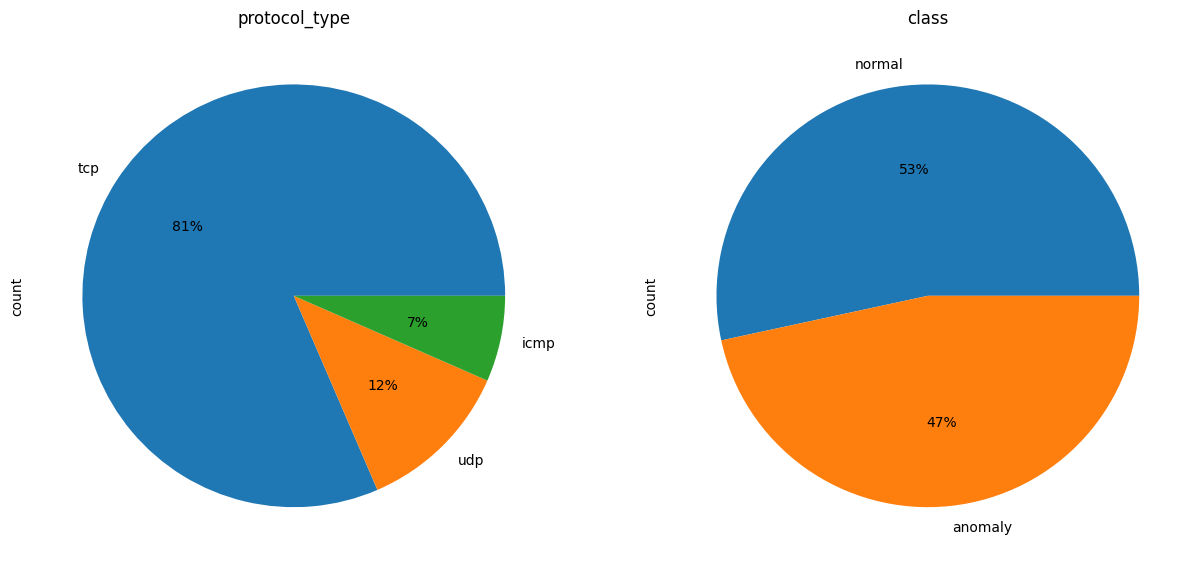

In [ ]:
pie_plot(dataset, ['protocol_type', 'class'], 1, 2)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


## Dataset Encoding

1.   One Hot Encoding
2.   Label Encoding



In [ ]:
# Encoding features
le = LabelEncoder()
dataset['protocol_type'] = le.fit_transform(dataset['protocol_type'])
dataset['service'] = le.fit_transform(dataset['service'])
dataset['flag'] = le.fit_transform(dataset['flag'])
dataset['class'] = le.fit_transform(dataset['class'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  int64  
 2   service                      25192 non-null  int64  
 3   flag                         25192 non-null  int64  
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
dataset.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,25192.000000,25192.000000,25192.000000,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,1.053827,29.039139,6.982455,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,...,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769,0.533860
std,2686.555640,0.426998,15.555601,2.679322,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,...,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333,0.498862
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,19.000000,5.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,22.000000,9.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,...,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,46.000000,9.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000
max,42862.000000,2.000000,65.000000,10.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
print(dataset.isnull().sum())  # Returns count of nulls in each column

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_s

In [ ]:
dataset = dataset.drop_duplicates()  # Remove duplicate rows

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  int64  
 2   service                      25192 non-null  int64  
 3   flag                         25192 non-null  int64  
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
X = dataset.drop(['class'], axis=1)
y = dataset['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

## Model

LogisticRegression(max_iter=10000)

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

([<matplotlib.axis.XTick at 0x78801eab83d0>,
 [Text(0, 0, 'Normal'), Text(1, 0, 'Attack')])

([<matplotlib.axis.YTick at 0x78801eab83a0>,
 [Text(0, 0, 'Normal'), Text(0, 1, 'Attack')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

Text(0, 0, 'TN=2231')

Text(1, 0, 'FP=134')

Text(0, 1, 'FN=81')

Text(1, 1, 'TP=2593')

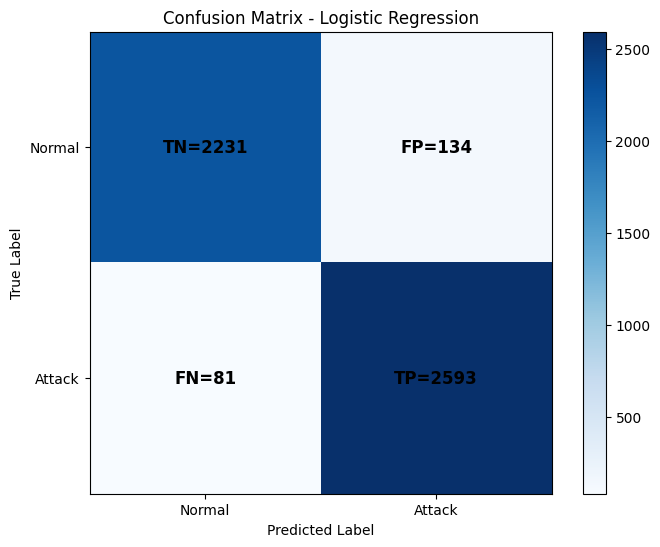

Results for Logistic Regression:
Accuracy: 0.9573328041278031
Precision: 0.9579135753829131
F1-score: 0.957111459138321


In [ ]:
# Logistic Regression
# Logistic Regression
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate TP, TN, FP, FN
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.colorbar()
tick_marks = np.arange(len(["Normal", "Attack"]))
plt.xticks(tick_marks, ["Normal", "Attack"])
plt.yticks(tick_marks, ["Normal", "Attack"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.text(0, 0, f"TN={tn}", ha="center", va="center", color="black", fontsize=12, fontweight="bold")
plt.text(1, 0, f"FP={fp}", ha="center", va="center", color="black", fontsize=12, fontweight="bold")
plt.text(0, 1, f"FN={fn}", ha="center", va="center", color="black", fontsize=12, fontweight="bold")
plt.text(1, 1, f"TP={tp}", ha="center", va="center", color="black", fontsize=12, fontweight="bold")
plt.show()

# Print results
print("Results for Logistic Regression:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1-score:", f1)

SVC()

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix - SVM')

([<matplotlib.axis.XTick at 0x78801e6b3d00>,
 [Text(0, 0, 'Normal'), Text(1, 0, 'Attack')])

([<matplotlib.axis.YTick at 0x78801e6b2b00>,
 [Text(0, 0, 'Normal'), Text(0, 1, 'Attack')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

Text(0, 0, 'TN=2302')

Text(1, 0, 'FP=63')

Text(0, 1, 'FN=44')

Text(1, 1, 'TP=2630')

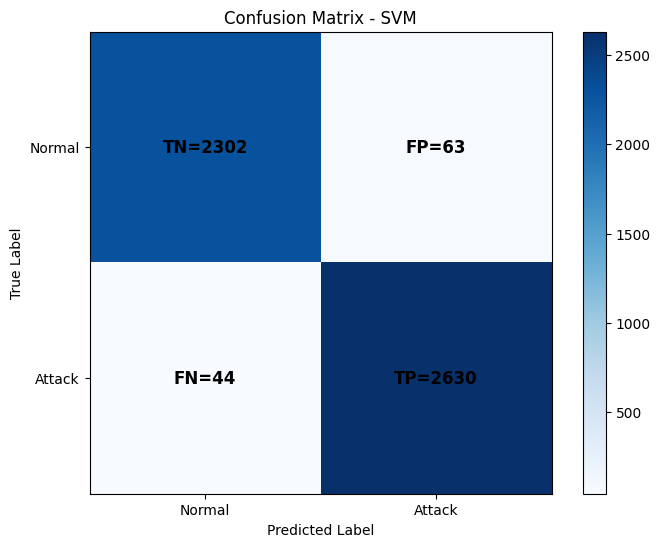

Results for SVM:
Accuracy: 0.9787656281008137
Precision: 0.978925343688873
F1-score: 0.9786752751361467


In [ ]:
# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)


# Calculate TP, TN, FP, FN
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SVM")
plt.colorbar()
tick_marks = np.arange(len(["Normal", "Attack"]))
plt.xticks(tick_marks, ["Normal", "Attack"])
plt.yticks(tick_marks, ["Normal", "Attack"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.text(0, 0, f"TN={tn}", ha="center", va="center", color="black", fontsize=12, fontweight="bold")
plt.text(1, 0, f"FP={fp}", ha="center", va="center", color="black", fontsize=12, fontweight="bold")
plt.text(0, 1, f"FN={fn}", ha="center", va="center", color="black", fontsize=12, fontweight="bold")
plt.text(1, 1, f"TP={tp}", ha="center", va="center", color="black", fontsize=12, fontweight="bold")
plt.show()

# Print results
print("Results for SVM:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1-score:", f1)

Index(['duration', 'protocol_type', 'service', 'flag', 'wrong_fragment',
       'logged_in', 'is_guest_login', 'count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')


LogisticRegression(max_iter=10000)

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

([<matplotlib.axis.XTick at 0x78805afaa0e0>,
 [Text(0, 0, 'Normal'), Text(1, 0, 'Attack')])

([<matplotlib.axis.YTick at 0x78805aea1330>,
 [Text(0, 0, 'Normal'), Text(0, 1, 'Attack')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

Text(0, 0, 'TN=2228')

Text(1, 0, 'FP=137')

Text(0, 1, 'FN=81')

Text(1, 1, 'TP=2593')

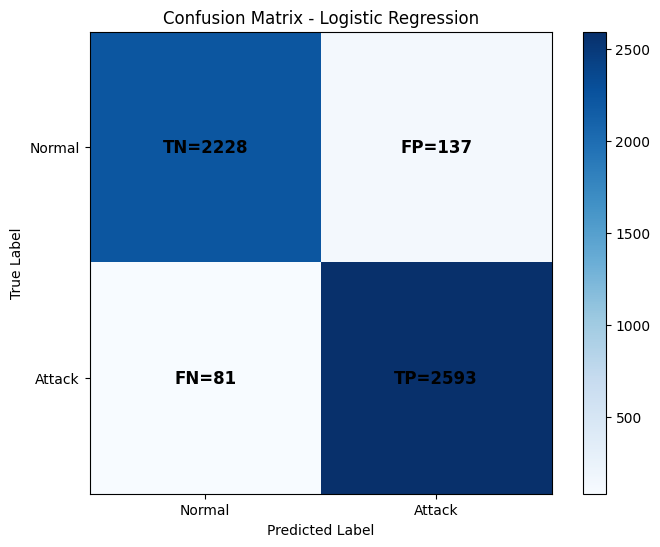

Results for Logistic Regression:
Accuracy: 0.9567374479063306
Precision: 0.9573683642761166
F1-score: 0.9565092593736332


In [ ]:
# Feature selection using chi-square
from sklearn.feature_selection import SelectKBest, chi2
k_best = SelectKBest(score_func=chi2, k=25)  # Select top 15 features
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

# Get selected feature names
selected_feature_names = X.columns[k_best.get_support()]
print(selected_feature_names)
# Train Logistic Regression on selected features
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_selected, y_train)
y_pred = lr.predict(X_test_selected)


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate TP, TN, FP, FN
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.colorbar()
tick_marks = np.arange(len(["Normal", "Attack"]))
plt.xticks(tick_marks, ["Normal", "Attack"])
plt.yticks(tick_marks, ["Normal", "Attack"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.text(0, 0, f"TN={tn}", ha="center", va="center", color="black", fontsize=12, fontweight="bold")
plt.text(1, 0, f"FP={fp}", ha="center", va="center", color="black", fontsize=12, fontweight="bold")
plt.text(0, 1, f"FN={fn}", ha="center", va="center", color="black", fontsize=12, fontweight="bold")
plt.text(1, 1, f"TP={tp}", ha="center", va="center", color="black", fontsize=12, fontweight="bold")
plt.show()

# Print results
print("Results for Logistic Regression:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1-score:", f1)